In [4]:
include("../src/Conduction.jl");
using Plots, LaTeXStrings, QuadGK;

semiconductor = Conduction.Semiconductor(
4.34e7, # decay constant of the assumed hydrogen-like localized state wave functions (cm^-1)
0.1 * 1.6e-19, # Mode effect of the phonons (J)
3e21, # intrinsic semiconductor's density (cm^-3)
0, # Doping states' density (cm^-3)
0.1 * 1.6e-19, # Energy to a vacant target site (J)
1e13, # Base electron jump rate
-27, # Fermi level (J)
2.74, # Intrinsic semiconductor's gaussian width (J)
2.7, # Doping states' gaussian width (J)
2.7, # Amount of disorder
);
F = -5.3e4; # Field (V.cm^-1)
T = 300;
range = -15:0.5:15;

In [5]:
res = (x -> Conduction.electronMobility(semiconductor, x, T, F)).(range);

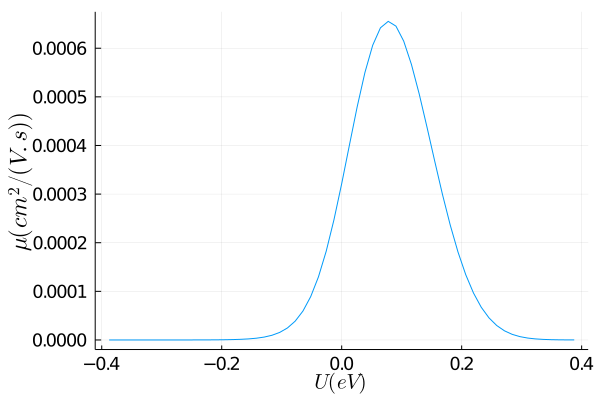

In [6]:
plot(range .* ((Conduction.k * T) / (1.602e-19)), res, xlabel=L"U (eV)", ylabel=L"\mu(cm^2 / (V.s))", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)

In [7]:
res = res .* Conduction.q .* Conduction.k .* T .* (x -> Conduction.DOS(semiconductor, x, T)).(range) .* (x -> Conduction.F(semiconductor, x, T)).(range);

In [ ]:
plot(range .* ((Conduction.k * T) / (1.602e-19)), res, xlabel=L"U (eV)", ylabel=L"\sigma (S s^{-1})", label="", xguidefontsize=14,  yguidefontsize=16, legendfontsize=10, ytickfontsize=12,  xtickfontsize=12)